In [ ]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/Medical insurance cost prediction /insurance.csv")

**Exploring the dataset**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Returns number of rows and columns of the dataset
df.shape

(1338, 7)

In [ ]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Returns basic statistics on numeric columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# check if any null value is present
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Visualization**

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

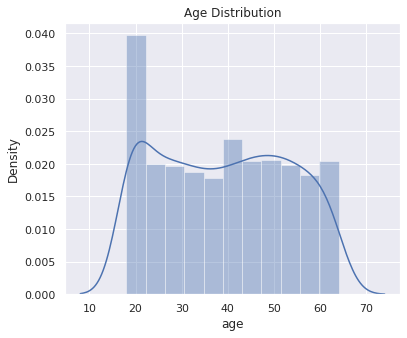

In [ ]:
# distribution of age value

sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

In [ ]:
# Gender column

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

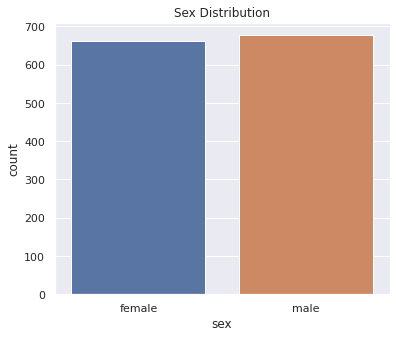

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'sex', data =df)
plt.title("Sex Distribution")
plt.show()

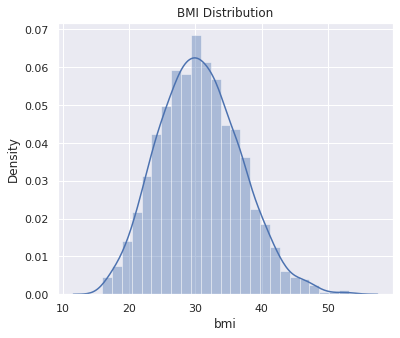

In [ ]:
# bmi distribution

sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

In [ ]:
# Children column

df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

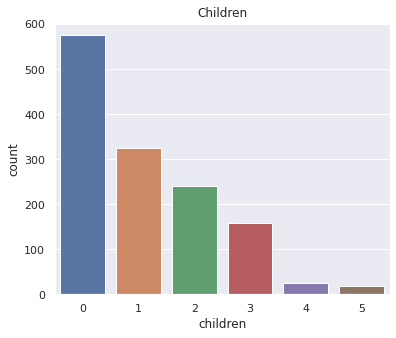

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'children', data =df)
plt.title("Children")
plt.show()

In [ ]:
# Smoker column

df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

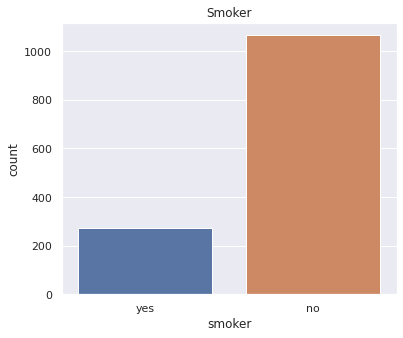

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'smoker', data =df)
plt.title("Smoker")
plt.show()

In [ ]:
# region column

df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

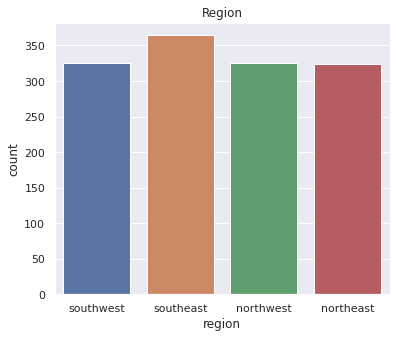

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(x = 'region', data =df)
plt.title("Region")
plt.show()

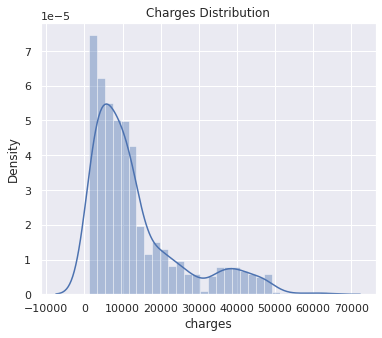

In [ ]:
# distribution of charges value

sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df['charges'])
plt.title("Charges Distribution")
plt.show()

**Data Preprocessing**

In [ ]:
# converting categorical variable into numerical

df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
## Correlation
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


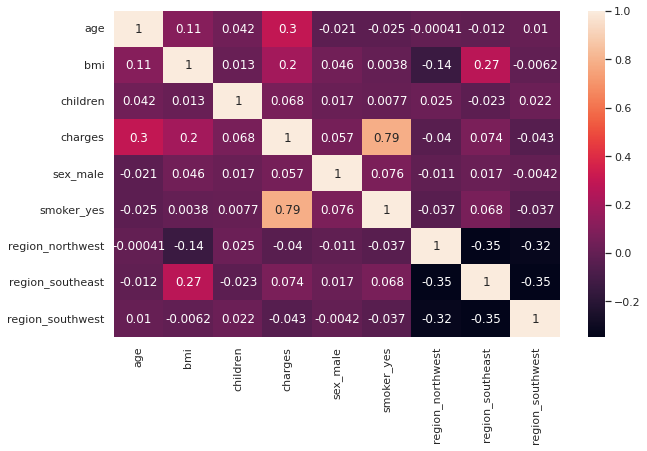

In [ ]:
#Correlation

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)

**Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1070, 8), X_test size: (268, 8)


In [ ]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled 

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

**Model Training**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
## print the coefficients and the intercept

print(linear.coef_)

[ 3.57251875e+03  2.07745794e+03  5.28603986e+02 -7.73099946e+00
  9.52373675e+03 -1.10681022e+02 -4.07684444e+02 -3.32163909e+02]


In [ ]:
print(linear.intercept_)

13201.182056009347


In [ ]:
print(linear.score(X_test_scaled, y_test))

0.7999876970680434


In [ ]:
pred1 = linear.predict(X_test_scaled)

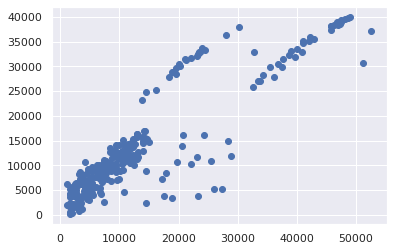

In [ ]:
## plot a scatter plot for the prediction

plt.scatter(y_test,pred1)

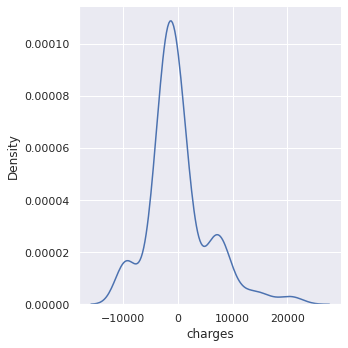

In [ ]:
sns.displot(y_test - pred1, kind="kde")

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MAE:", metrics.mean_absolute_error(y_test,pred1))
print("MSE:", metrics.mean_squared_error(y_test,pred1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred1)))

MAE: 3933.272649405241
MSE: 31827950.229523834
RMSE: 5641.62655885019


In [ ]:
# R square and adjusted R square

from sklearn.metrics import r2_score
score=r2_score(y_test,pred1)
print(score)

0.7999876970680434


In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.793809710877095

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#List Hyperparameters to tune

params = {"alpha": [0.0001, 0.001, 0.1, 1, 5, 10, 20]}

In [ ]:
ridge = Ridge()
ridge_regressor = RandomizedSearchCV(ridge, params, cv = 5, n_jobs = -1)

In [ ]:
ridge_regressor.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.1, 1, 5, 10,
                                                  20]})

In [ ]:
ridge_regressor.best_params_

{'alpha': 5}

In [ ]:
ridge_model = Ridge(alpha = 5)
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=5)

In [ ]:
print(ridge_model.score(X_test_scaled, y_test))

0.7996221710323475


In [ ]:
pred2 = ridge_model.predict(X_test_scaled)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test,pred2))
print("MSE:", metrics.mean_squared_error(y_test,pred2))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred2)))

MAE: 3942.1848592386145
MSE: 31886116.373811893
RMSE: 5646.7792921108485


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso_regressor = RandomizedSearchCV(lasso, params, cv = 5, n_jobs = -1)
lasso_regressor.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.1, 1, 5, 10,
                                                  20]})

In [ ]:
lasso_regressor.best_params_

{'alpha': 20}

In [ ]:
lasso_model = Lasso(alpha = 20)
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=20)

In [ ]:
pred3 = lasso_model.predict(X_test_scaled)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test,pred3))
print("MSE:", metrics.mean_squared_error(y_test,pred3))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred3)))

MAE: 3938.719588924837
MSE: 31914039.288683422
RMSE: 5649.251214867632


Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#List Hyperparameters to tune

params = {
    'n_estimators':[50,100,200,300,400],
    'max_depth':[5,10,20,30,50],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sqrt','log2']}

In [ ]:
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf, params, cv = 5, n_jobs = -1)

In [ ]:
rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]})

In [ ]:
rf_cv.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200)

In [ ]:
rf_model = RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=5,n_estimators=50)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=50)

In [ ]:
pred4 = rf_model.predict(X_test)

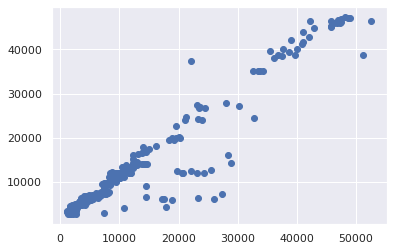

In [ ]:
## plot a scatter plot for the prediction

plt.scatter(y_test,pred4)

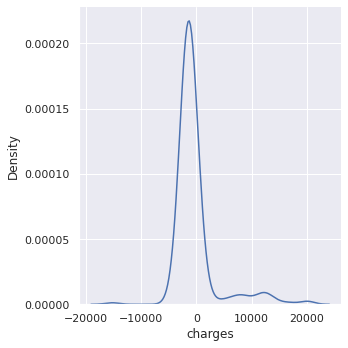

In [ ]:
sns.displot(y_test - pred4, kind="kde")

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test,pred4))
print("MSE:", metrics.mean_squared_error(y_test,pred4))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred4)))

MAE: 2362.391678143684
MSE: 15651249.531547025
RMSE: 3956.1660141539846


In [ ]:
# R square and adjusted R square

from sklearn.metrics import r2_score
score4=r2_score(y_test,pred4)
print(score4)

0.9016448611992736


In [ ]:
#display adjusted R-squared
1 - (1-score4)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8986068646340002

XGBoost regression

In [ ]:
import xgboost

In [ ]:
#List Hyperparameters to tune

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
}

In [ ]:
xgb = xgboost.XGBRegressor()
xgb_cv = RandomizedSearchCV(xgb, params, cv = 5, n_jobs = -1)

In [ ]:
xgb_cv.fit(X_train,y_train)

[19:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]})

In [ ]:
xgb_cv.best_estimator_

XGBRegressor(gamma=0.3, min_child_weight=5)

In [ ]:
xgb_model = xgboost.XGBRegressor(gamma=0.3, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

[19:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.3, learning_rate=0.05)

In [ ]:
pred5 = xgb_model.predict(X_test)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test,pred5))
print("MSE:", metrics.mean_squared_error(y_test,pred5))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred5)))

MAE: 2354.1627660320078
MSE: 15820542.650164783
RMSE: 3977.5045757566118


In [ ]:
# R square and adjusted R square

from sklearn.metrics import r2_score
score5=r2_score(y_test,pred5)
print(score5)

0.9005809941804713


In [ ]:
#display adjusted R-squared
1 - (1-score5)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8975101368578604

From the above observation we can say that the performance (RMSE & R-sqaured) of Random forest regressor model is good as compared to other models.

In [ ]:
# pickling Random forest regressor model

import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

**Model Prediction**

In [ ]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
621,37,34.100,4,1,1,0,0,1
194,18,34.430,0,1,0,0,1,0
240,23,36.670,2,0,1,0,0,0
1168,32,35.200,2,1,0,0,0,1
1192,58,32.395,1,0,0,0,0,0


In [ ]:
rf_model.predict([[18, 33.77, 1, 1, 0, 0, 1, 0]])

array([4330.72353724])

In [ ]:
rf_model.predict([[19, 27.9, 0, 0, 1, 0, 0, 1]])

array([18150.11192309])